## AS03: Similiridade Textual
**Aluno: Vinícius Henrique Giovanini**  
**Matricula: 692225**  
**Professor: Wladmir Cardoso Brandão**  

**OBS** Todas os graficos podem ser visto pelo proprio notebook ou dentro da pastas **/saidas/AS03/** tem todas as imagens do heatmap 

In [94]:
from sklearn.datasets import fetch_20newsgroups
import pprint as pp
import re
import numpy as np
import json

In [95]:
## Criação dos diretorios necessários caso não exista
import os

path = "../saidas/AS03/"

if not os.path.exists(path):
    os.makedirs(path)

Carregando dataset

In [96]:
with open("../datasets/headlines.txt", 'r', encoding='utf-8') as file:
  documents = file.readlines()

In [97]:
documents_clean = []

for each in documents:
  documents_clean.append(each.replace("\n", ""))

In [98]:
documents_clean

['Investors unfazed by correction as crypto funds see $154 million inflows',
 'Bitcoin, Ethereum prices continue descent, but crypto funds see inflows',
 'The surge in euro area inflation during the pandemic: transitory but with upside risks',
 "Inflation: why it's temporary and raising interest rates will do more harm than good",
 'Will Cryptocurrency Protect Against Inflation?',
 'Tweed is a crypto wallet API to add a web3 flavor to any web service',
 'Who Created Bitcoin? Learn About The Biggest Cryptos, Including Dogecoin, Big Eyes Coin',
 'Cryptocurrency Prices And News: Bitcoin, Cryptos Fall After Silvergate Bank Liquidation News',
 'Silvergate Capital To Shut Down, Liquidate Crypto-Friendly Silvergate Bank',
 'Dow Jones Rises On Surprise Jump In Jobless Claims; Bitcoin Drops As Crypto Bank Silvergate Crashes 40%']

## Pre-processamento

In [99]:
def clean_txts(txt):
  tokens = re.sub("[^\w]", " ", txt).split()
  clean_txt = [w.lower() for w in tokens]
  # clean_txt.append("\n")
  return " ".join(clean_txt)

# Limpando o dataset inteiro removendo caracteres especiais e colocand to lower case
data_list_cleaned = []

for line in documents_clean:
 data_list_cleaned.append(clean_txts(line))

In [100]:
print(data_list_cleaned)

['investors unfazed by correction as crypto funds see 154 million inflows', 'bitcoin ethereum prices continue descent but crypto funds see inflows', 'the surge in euro area inflation during the pandemic transitory but with upside risks', 'inflation why it s temporary and raising interest rates will do more harm than good', 'will cryptocurrency protect against inflation', 'tweed is a crypto wallet api to add a web3 flavor to any web service', 'who created bitcoin learn about the biggest cryptos including dogecoin big eyes coin', 'cryptocurrency prices and news bitcoin cryptos fall after silvergate bank liquidation news', 'silvergate capital to shut down liquidate crypto friendly silvergate bank', 'dow jones rises on surprise jump in jobless claims bitcoin drops as crypto bank silvergate crashes 40']


## Metricas de Similaridades

In [101]:
import numpy as np
from sklearn.metrics.pairwise import (
    cosine_similarity,
    euclidean_distances,
    manhattan_distances,
    pairwise_distances
)

def calculate_similarity_matrix(vectors, metric):
    if metric == 'cosine':
        print("Matrix com Cosine")
        return cosine_similarity(vectors)
    if metric == 'manhattan':
        print("Matrix com Manhattan")
        return manhattan_distances(vectors)
    elif metric == 'euclidean':
        print("Matrix com Euclidean")
        return euclidean_distances(vectors)
    elif metric == 'minkowski':
        print("Matrix com Minkowski")
        return pairwise_distances(vectors, metric='minkowski', p=3)
    elif metric == 'jaccard':
        print("Matrix com Jaccard")
        return pairwise_distances(vectors, metric='jaccard')

## Criação do Heatmap

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
def create_heatmap(similarity_matrix, metric, method):
  
    if(len(similarity_matrix) == 0):
      print("Matriz com size 0")
      return
  
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=False, cmap="YlGnBu")
    plt.title(f"{method} - {metric}")
    plt.xlabel("Document ID")
    plt.ylabel("Document ID")
    plt.savefig(f"../saidas/AS03/{method}-{metric}.png")
    plt.show()

## One-Hot Encoding

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(data_list_cleaned)
one_hot_encoding = vectorizer.transform(data_list_cleaned).toarray()
print(one_hot_encoding)

[[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
  0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
  0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
  1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 

## Count Vectors

In [104]:
count_vectorizer = CountVectorizer()
count_vectors_resp = count_vectorizer.fit_transform(data_list_cleaned)
count_vectors_array = count_vectors_resp.toarray()

In [105]:
print(count_vectors_array)

[[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
  0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
  0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
  1 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 

## TF-IDF

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(data_list_cleaned).toarray()

In [107]:
print(tfidf_vectors)

[[0.32891811 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.27961044 0.
  0.         0.         0.         0.         0.32891811 0.
  0.         0.         0.         0.32891811 0.         0.
  0.19531843 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.27961044 0.
  0.         0.         0.         0.         0.27961044 0.
  0.32891811 0.         0.         0.         0.         0.
  0.         0.         0.         0.32891811 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27961044 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.32891811 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.     

## N-grams (2-grams)

In [108]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))

count_vectors = count_vectorizer.fit_transform(data_list_cleaned)

count_vectors_array_n_grams = count_vectors.toarray()

In [109]:
print(count_vectors_array_n_grams)

[[1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


## Co-ocurrence Vectors (Context Window = 1)

In [110]:
from collections import defaultdict
co_occurrence_matrix = defaultdict(lambda: defaultdict(int))
window_size = 1
for i, doc in enumerate(data_list_cleaned):
    tokens = doc.split()
    for i, token in enumerate(tokens):
        for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
            if i != j:
                co_occurrence_matrix[token][tokens[j]] += 1

In [111]:
len(co_occurrence_matrix)

91

In [112]:
import pandas as pd
dict_normal_ocurrence = dict(co_occurrence_matrix)

df = pd.DataFrame(dict_normal_ocurrence)
df = df.fillna(0)
df

,investors,unfazed,by,correction,as,crypto,funds,see,154,million,...,jones,rises,on,surprise,jump,jobless,claims,drops,crashes,40
unfazed,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
investors,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
by,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
correction,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rises,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
on,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
surprise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [113]:
co_occurrence_matrix = df.values.tolist()

In [114]:
co_occurrence_matrix = np.array(co_occurrence_matrix)
co_occurrence_matrix

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Word2Vec

In [115]:
from gensim.models import Word2Vec
import nltk

sentences = [nltk.word_tokenize(doc.lower()) for doc in data_list_cleaned]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [116]:
primeira_frase = data_list_cleaned[0].split(" ")
word_embedding_dict = {}

for frase in data_list_cleaned:
  for token in frase.split(" "):
    if token != "\n":
      word_embedding_dict[token] = model.wv[token]
    
  
    

word_embedding_dict

{'investors': array([ 0.00627747, -0.00065856, -0.0042085 , -0.00367211, -0.00596634,
         0.00085833,  0.00937775,  0.00097835, -0.0053079 ,  0.00217584,
        -0.00102428, -0.00892062, -0.00971636, -0.00797065, -0.00313933,
         0.00479896,  0.00276378,  0.00488537, -0.00266374, -0.00749757,
        -0.00012534,  0.00532816,  0.00811276,  0.00901097, -0.00415336,
         0.00899827,  0.00058838,  0.00124079,  0.004974  , -0.00708674,
        -0.00155017,  0.00559303,  0.00421697,  0.00029627,  0.00477749,
         0.00811908,  0.00682347,  0.00075826,  0.00944876, -0.00580082,
         0.0029621 , -0.00765394,  0.00655122, -0.00952264, -0.00810811,
         0.00785654, -0.00856069,  0.00843925, -0.00306441, -0.00813223,
        -0.00250342,  0.00362407,  0.00946543, -0.00408996,  0.00310716,
         0.00748443, -0.00102608,  0.00932239, -0.00529956, -0.00098212,
        -0.00479201, -0.00231846,  0.00236669,  0.00802963,  0.00748948,
        -0.00435566, -0.00137946,  0.0

In [117]:
def dict_arrays_to_lists_of_lists(dict_arrays):
    dict_lists = {}
    for key, value in dict_arrays.items():
        if isinstance(value, np.ndarray):
            dict_lists[key] = value.tolist()
        else:
            dict_lists[key] = value
    
    return dict_lists

In [118]:
word_embedding_dict_tmp = dict_arrays_to_lists_of_lists(word_embedding_dict)
word_embedding_dict_normal_dict = []
for key, value in word_embedding_dict_tmp.items():
  word_embedding_dict_normal_dict.append(value)


In [119]:
word_embedding_dict_tmp

{'investors': [0.006277470383793116,
  -0.000658561650197953,
  -0.004208503756672144,
  -0.003672113874927163,
  -0.0059663369320333,
  0.0008583336020819843,
  0.009377752430737019,
  0.0009783495916053653,
  -0.005307898391038179,
  0.00217583985067904,
  -0.0010242806747555733,
  -0.00892061647027731,
  -0.009716356173157692,
  -0.00797064695507288,
  -0.003139333799481392,
  0.004798962268978357,
  0.002763784723356366,
  0.00488537410274148,
  -0.0026637413538992405,
  -0.007497573271393776,
  -0.00012533835251815617,
  0.005328163970261812,
  0.008112763985991478,
  0.009010967798531055,
  -0.0041533587500452995,
  0.00899826642125845,
  0.0005883805570192635,
  0.001240785582922399,
  0.004973999690264463,
  -0.007086737081408501,
  -0.00155017024371773,
  0.005593028385192156,
  0.0042169662192463875,
  0.000296265963697806,
  0.004777488298714161,
  0.008119075559079647,
  0.006823467090725899,
  0.0007582557736895978,
  0.00944876205176115,
  -0.0058008222840726376,
  0.0029

In [120]:
word_embedding_dict_normal_dict = np.array(word_embedding_dict_normal_dict)

In [121]:
len(word_embedding_dict_normal_dict)

91

In [122]:
word_embedding_dict_normal_dict

array([[ 0.00627747, -0.00065856, -0.0042085 , ..., -0.00759837,
        -0.00039202, -0.00415366],
       [-0.00274263,  0.00010893,  0.00203456, ...,  0.00554086,
         0.00694501, -0.00388079],
       [-0.00615539,  0.00466839, -0.00907093, ...,  0.00579817,
         0.00530303, -0.00729727],
       ...,
       [-0.00225822,  0.00192505,  0.00782333, ..., -0.00598776,
         0.00609428, -0.00438652],
       [-0.00059975,  0.00141231, -0.00118792, ..., -0.00320353,
        -0.00464701, -0.0043711 ],
       [-0.0049539 , -0.00127167,  0.00329456, ..., -0.00697138,
         0.00576234, -0.00943633]])

## Gerando as Métricas e Mapa de Calor

In [123]:

method_dict = {
  "one_hot_encoding" : -1,
  "count_vectores": -1,
  "tf-idf": -1,
  "ngrams":-1,
  "cv": -1,
  "wordtwovec" : -1,
}

metrics = {'jaccard':method_dict.copy(), 'manhattan' : method_dict.copy(), 'euclidean': method_dict.copy(), 'minkowski': method_dict.copy(), 'cosine': method_dict.copy()}



for metric, dict_method in metrics.items():
  
  old_dict = metrics[metric]
  old_dict["one_hot_encoding"] = calculate_similarity_matrix(one_hot_encoding, metric.lower())
  old_dict["count_vectores"] = calculate_similarity_matrix(count_vectors_array, metric.lower())
  old_dict["tf-idf"] = calculate_similarity_matrix(tfidf_vectors, metric.lower())
  old_dict["ngrams"] = calculate_similarity_matrix(count_vectors_array_n_grams, metric.lower())
  old_dict["cv"] = calculate_similarity_matrix(co_occurrence_matrix, metric.lower())
  old_dict["wordtwovec"] = calculate_similarity_matrix(word_embedding_dict_normal_dict, metric.lower())
  metrics[metric] = old_dict
  

Matrix com Jaccard
Matrix com Jaccard
Matrix com Jaccard
Matrix com Jaccard
Matrix com Jaccard
Matrix com Jaccard
Matrix com Manhattan
Matrix com Manhattan
Matrix com Manhattan
Matrix com Manhattan
Matrix com Manhattan
Matrix com Manhattan
Matrix com Euclidean
Matrix com Euclidean
Matrix com Euclidean
Matrix com Euclidean
Matrix com Euclidean
Matrix com Euclidean
Matrix com Minkowski
Matrix com Minkowski
Matrix com Minkowski
Matrix com Minkowski
Matrix com Minkowski
Matrix com Minkowski
Matrix com Cosine
Matrix com Cosine
Matrix com Cosine
Matrix com Cosine
Matrix com Cosine
Matrix com Cosine


d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\Text-Mining\text-mining-analysis\env\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\Text-Mining\text-mining-analysis\env\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\Text-Mining\text-mining-analysis\env\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\Text-Mining\text-mining-analysis\env\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\AREA_DE_TRABALHO\

In [124]:
for metric, dict_method in metrics.items():
  print(metric)
  print(dict_method)
  print("-----X-----")

jaccard
{'one_hot_encoding': array([[0.        , 0.76470588, 1.        , 1.        , 1.        ,
        0.95454545, 1.        , 1.        , 0.94736842, 0.92307692],
       [0.76470588, 0.        , 0.95454545, 1.        , 1.        ,
        0.95238095, 0.95454545, 0.89473684, 0.94444444, 0.92      ],
       [1.        , 0.95454545, 0.        , 0.96153846, 0.94117647,
        1.        , 0.96      , 1.        , 1.        , 0.96551724],
       [1.        , 1.        , 0.96153846, 0.        , 0.88235294,
        1.        , 1.        , 0.95833333, 1.        , 1.        ],
       [1.        , 1.        , 0.94117647, 0.88235294, 0.        ,
        1.        , 1.        , 0.93333333, 1.        , 1.        ],
       [0.95454545, 0.95238095, 1.        , 1.        , 1.        ,
        0.        , 1.        , 1.        , 0.89473684, 0.96428571],
       [1.        , 0.95454545, 0.96      , 1.        , 1.        ,
        1.        , 0.        , 0.90909091, 1.        , 0.96551724],
       [1.  

## Gerando o Heatmap de todas as metricas e enconding

Heatmap referente à métrica JACCARD


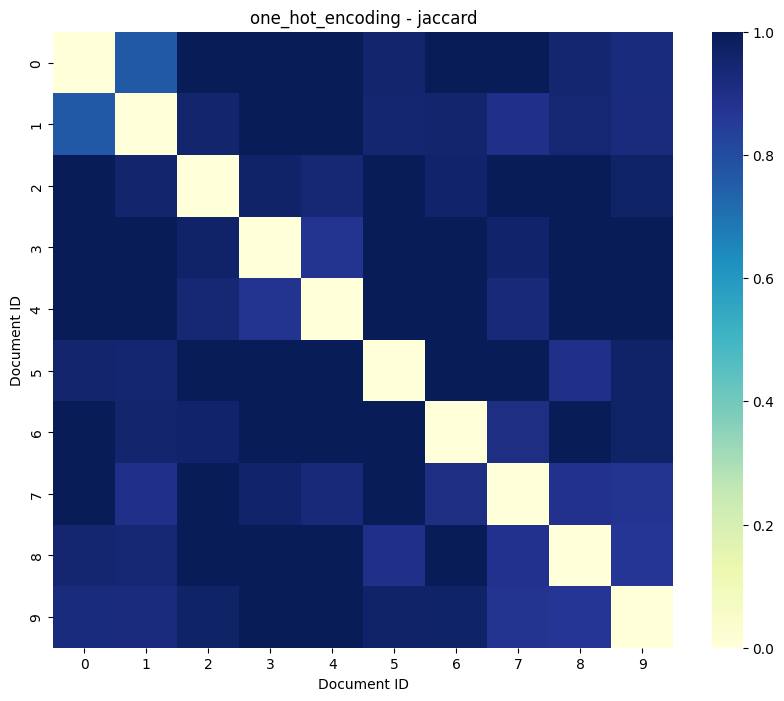

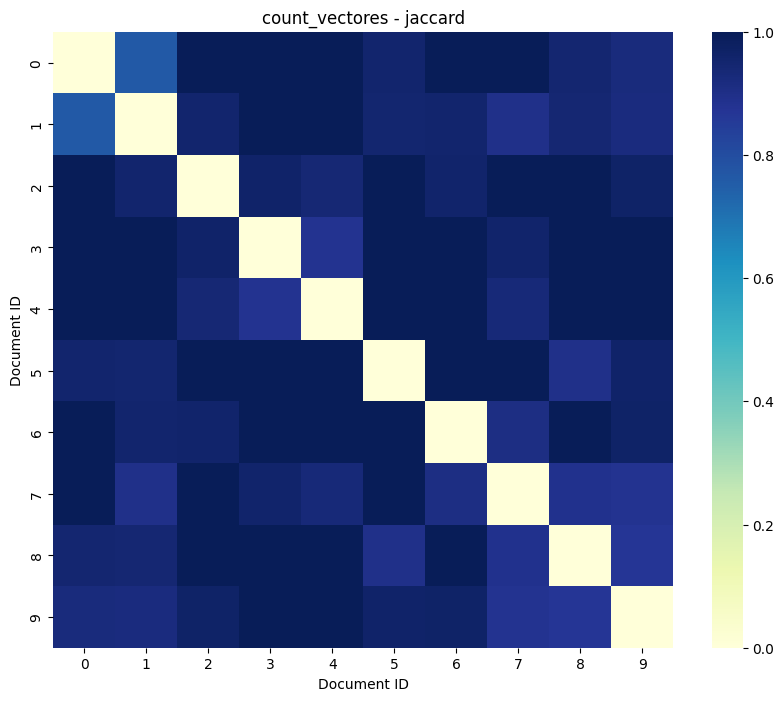

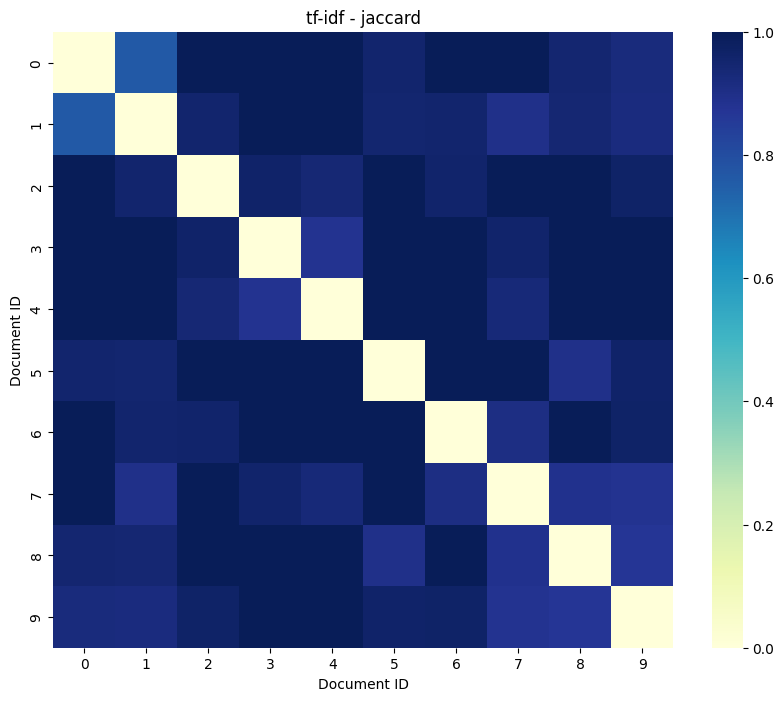

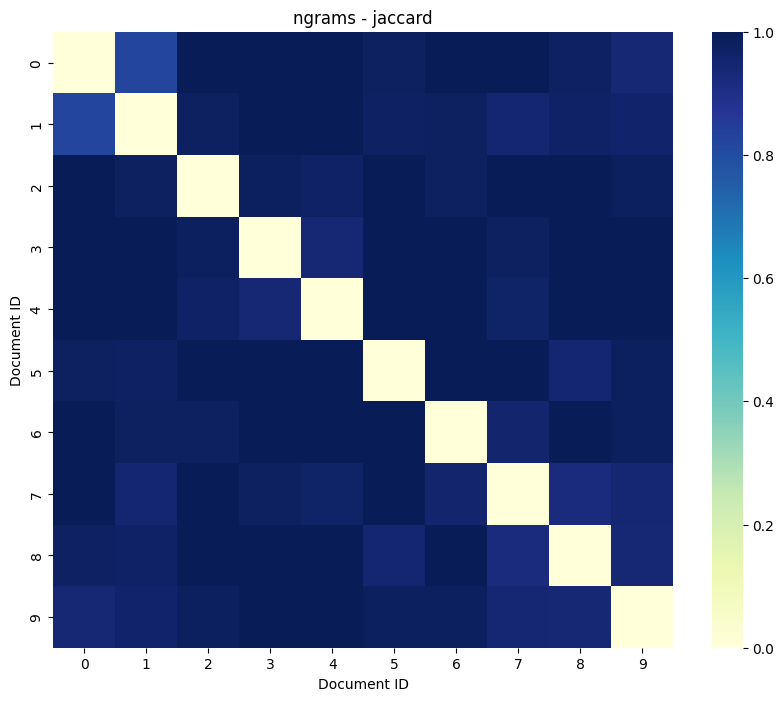

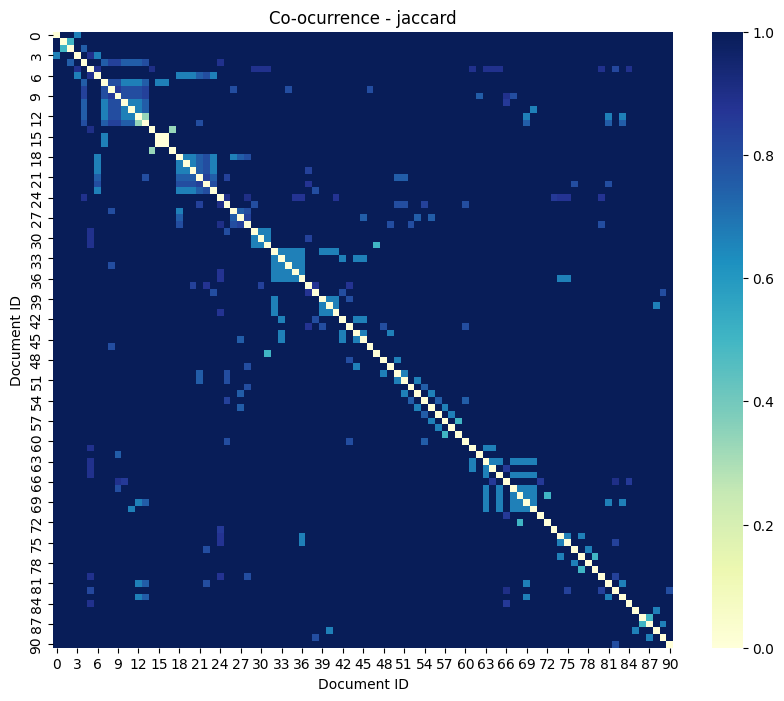

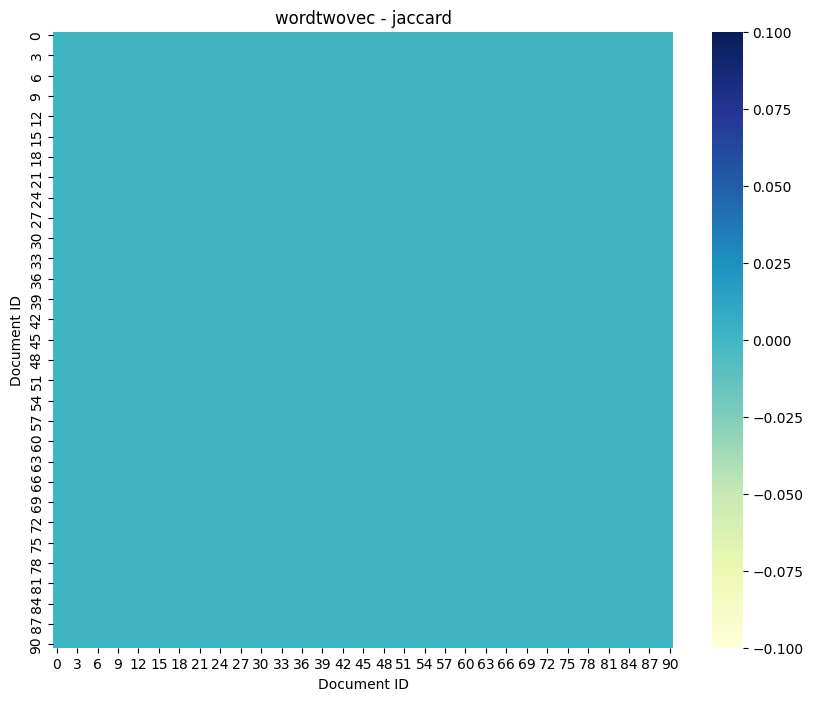

----------X----------
Heatmap referente à métrica MANHATTAN


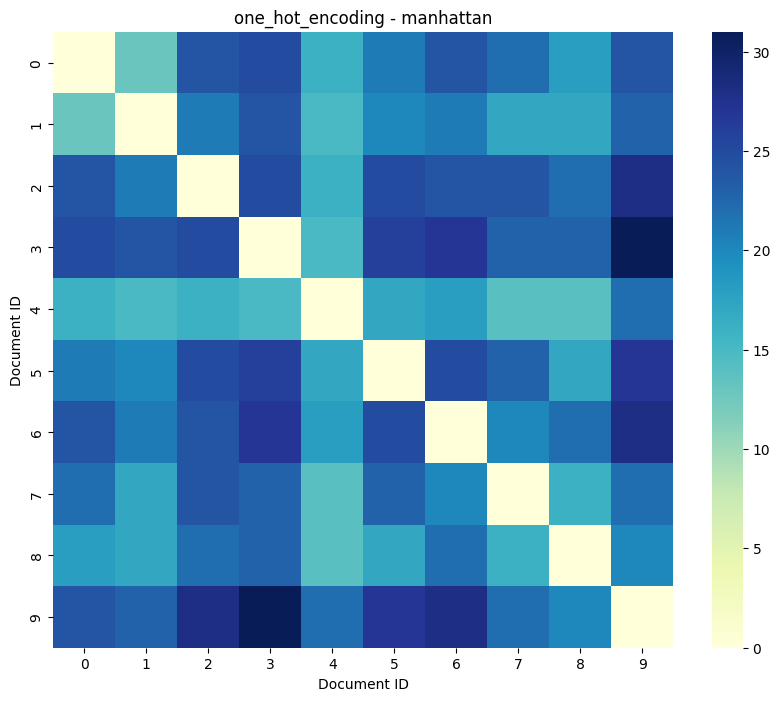

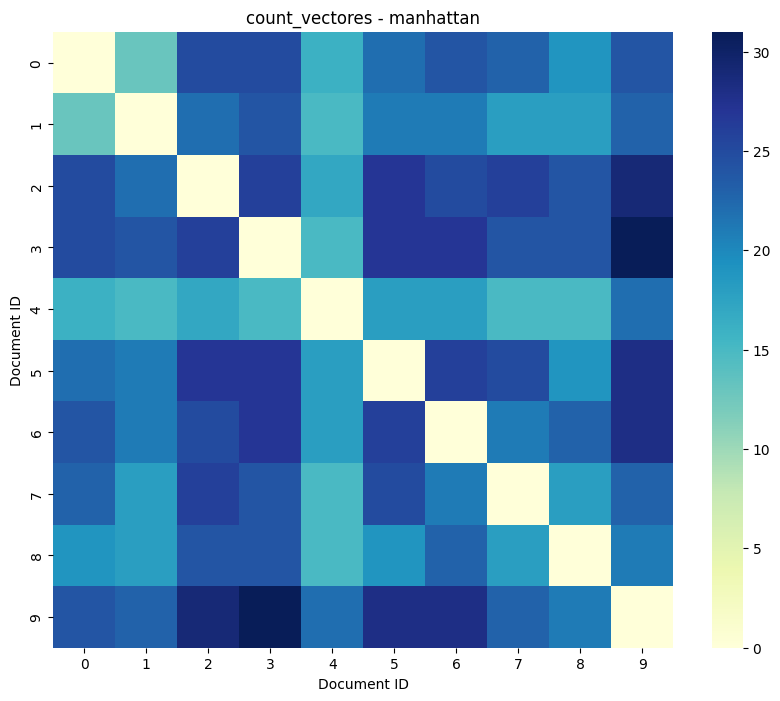

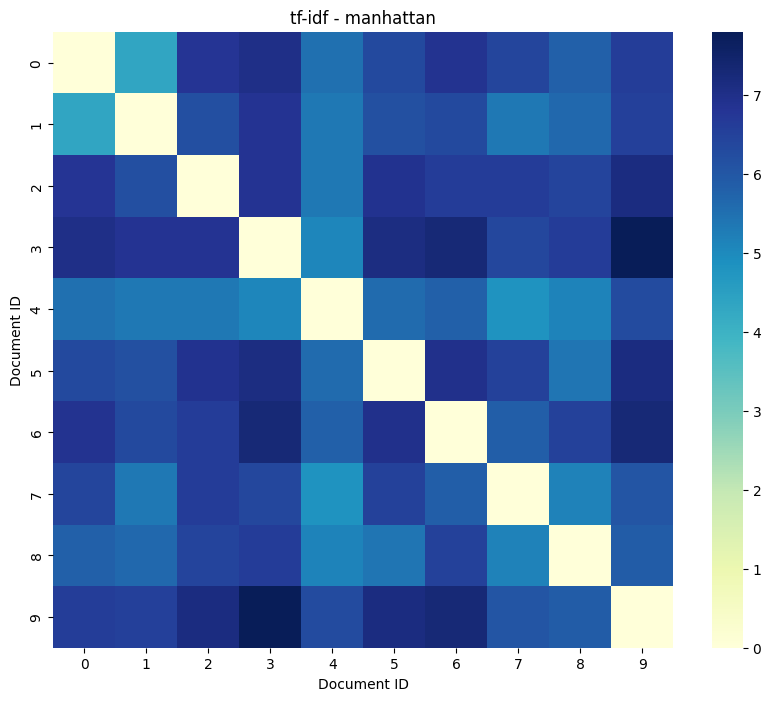

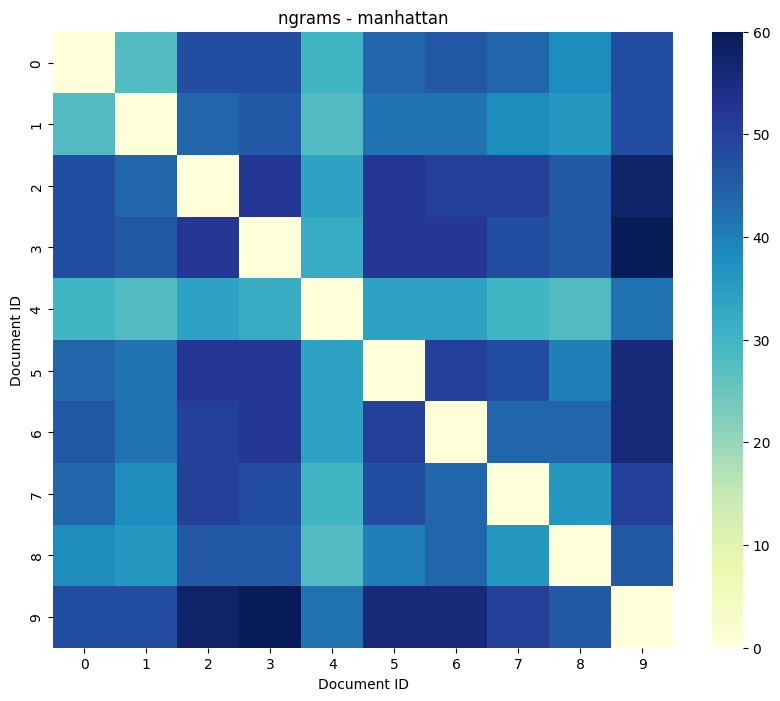

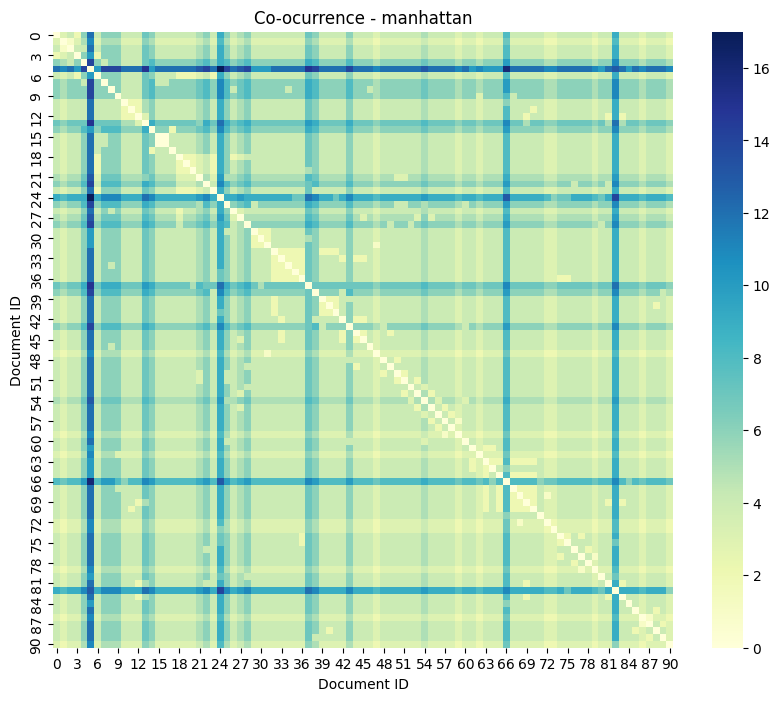

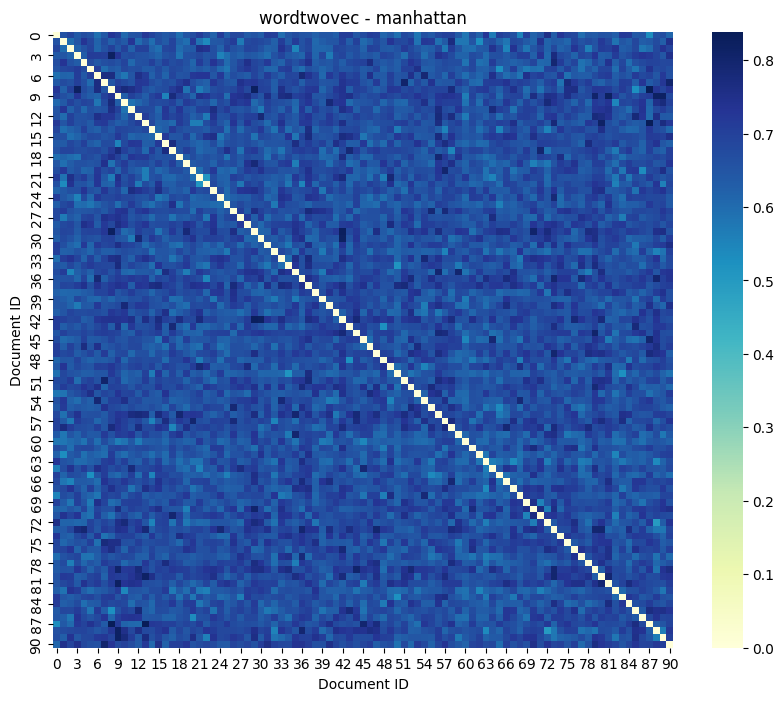

----------X----------
Heatmap referente à métrica EUCLIDEAN


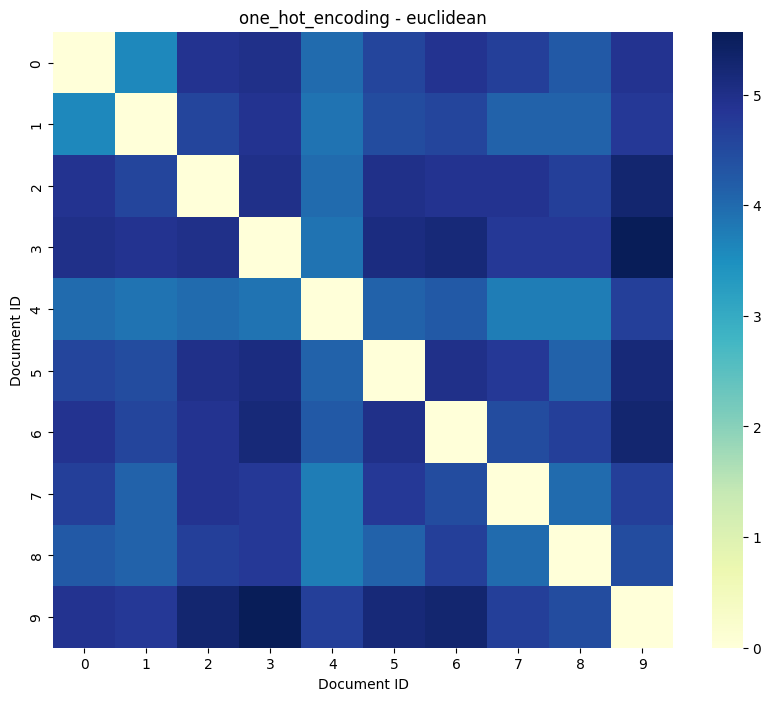

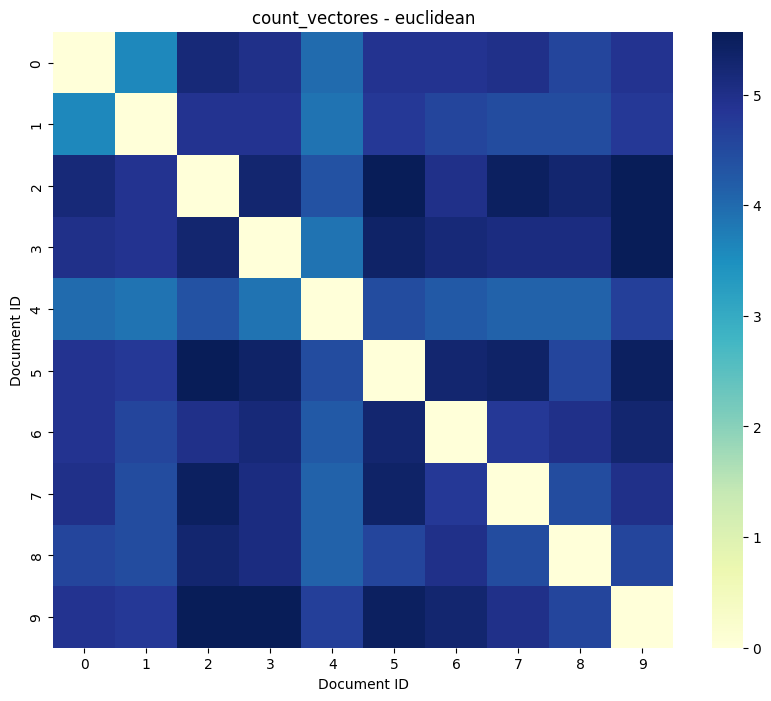

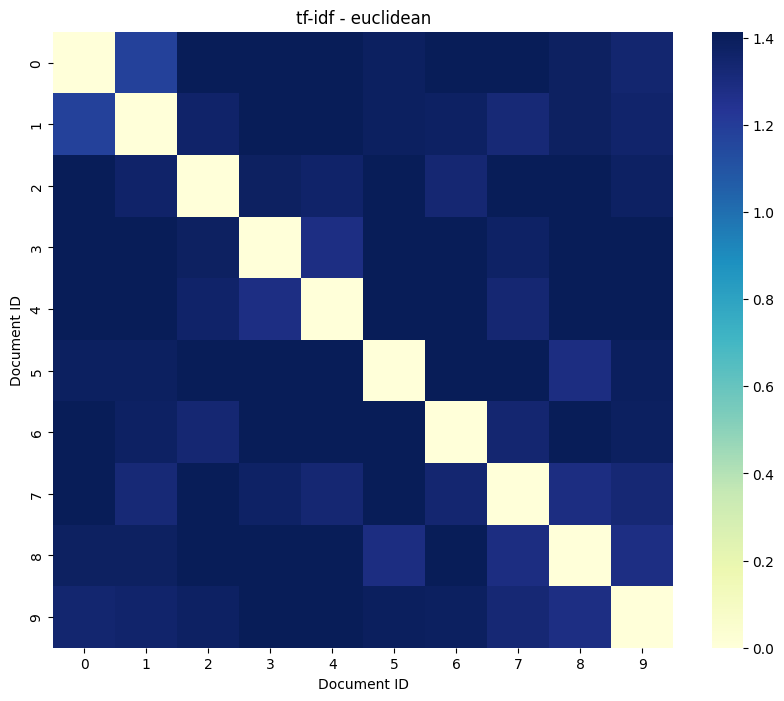

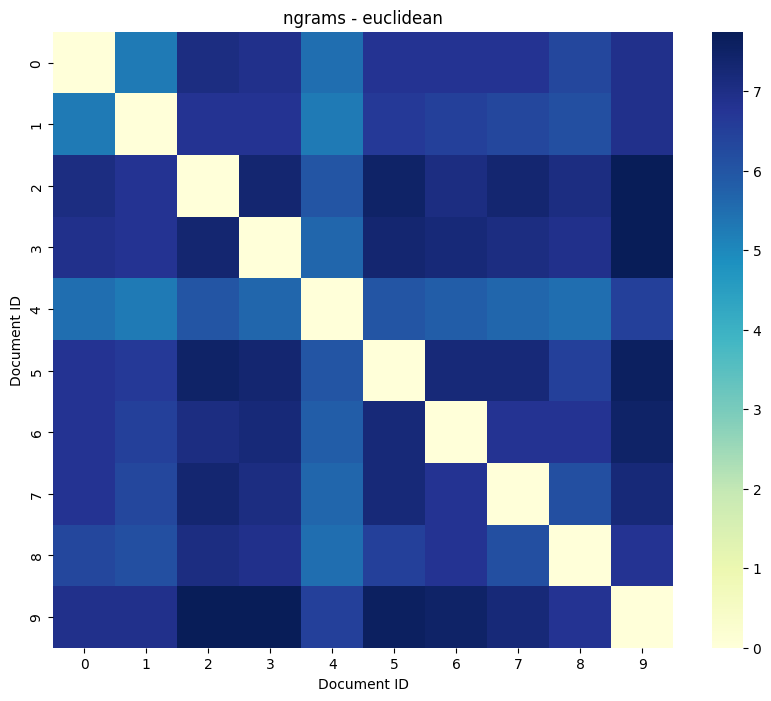

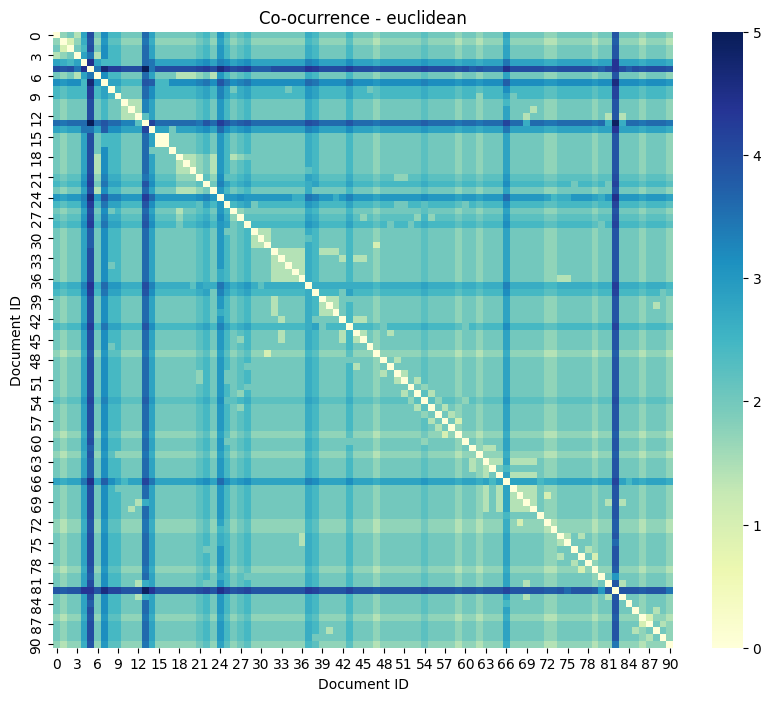

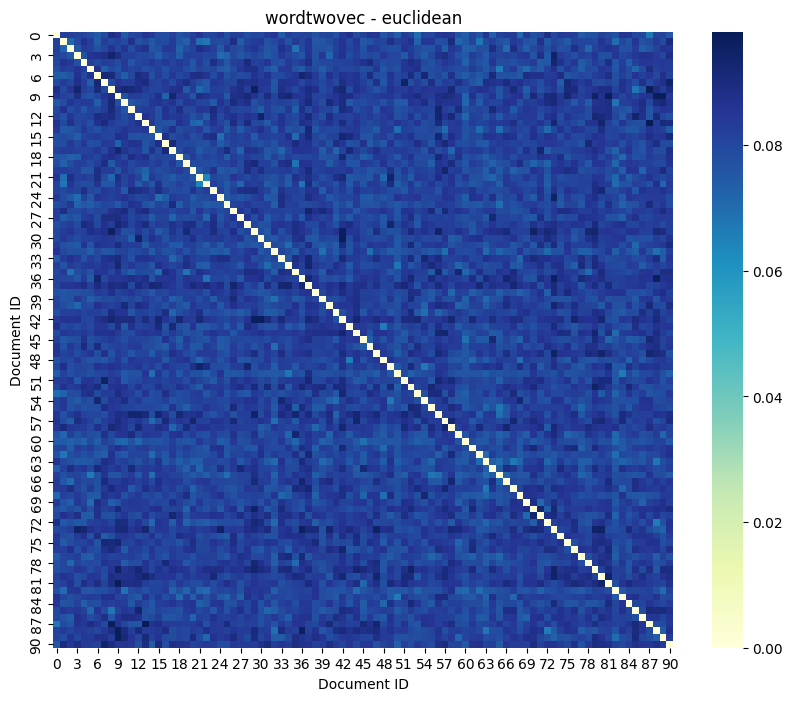

----------X----------
Heatmap referente à métrica MINKOWSKI


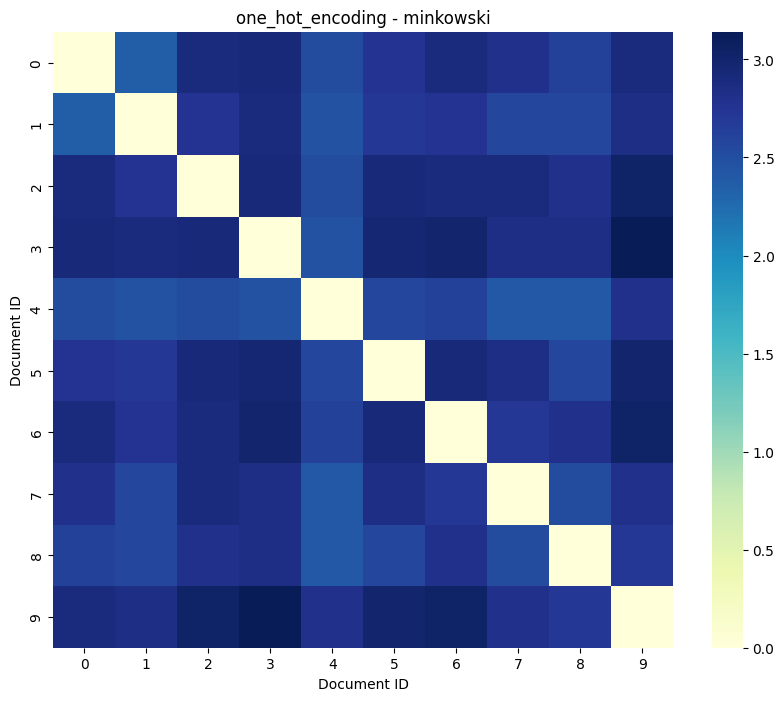

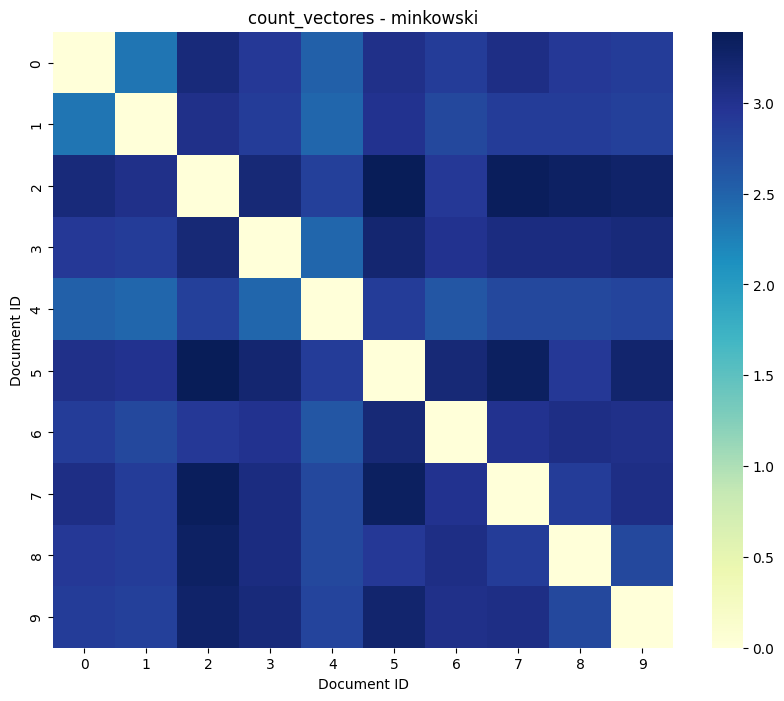

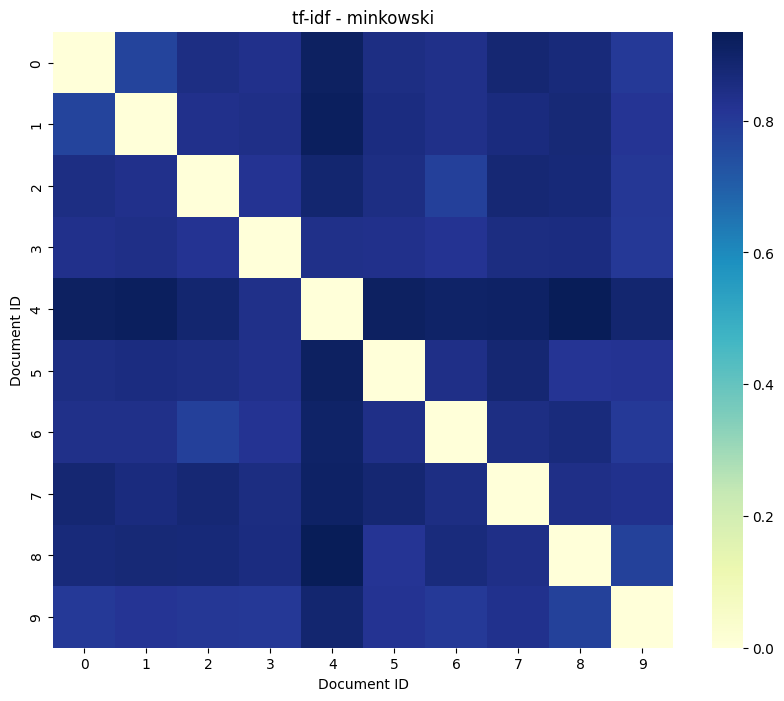

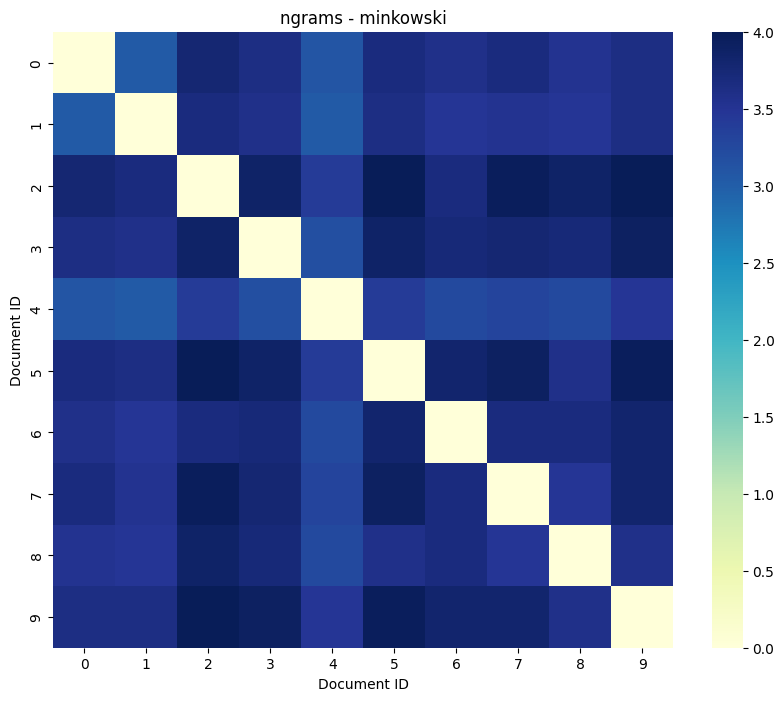

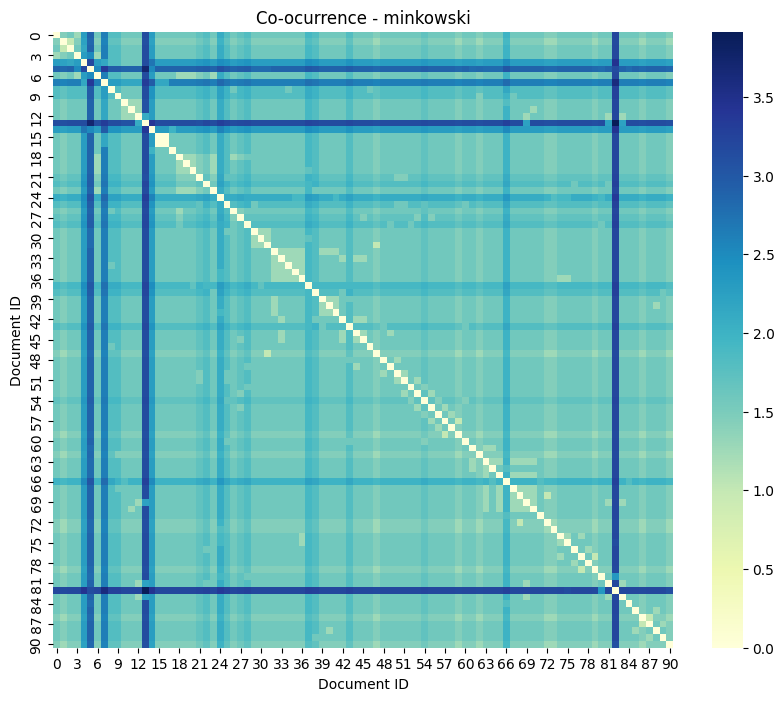

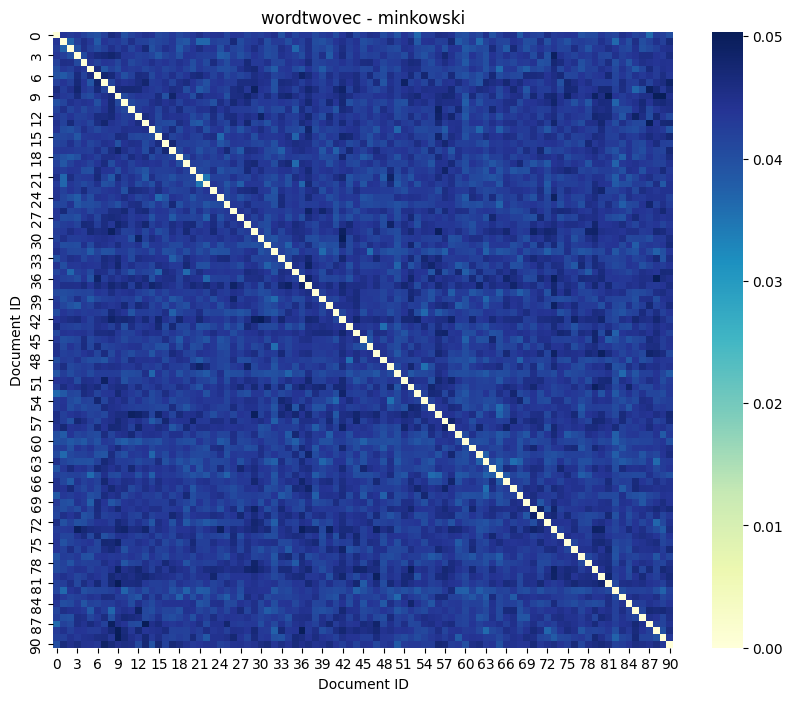

----------X----------
Heatmap referente à métrica COSINE


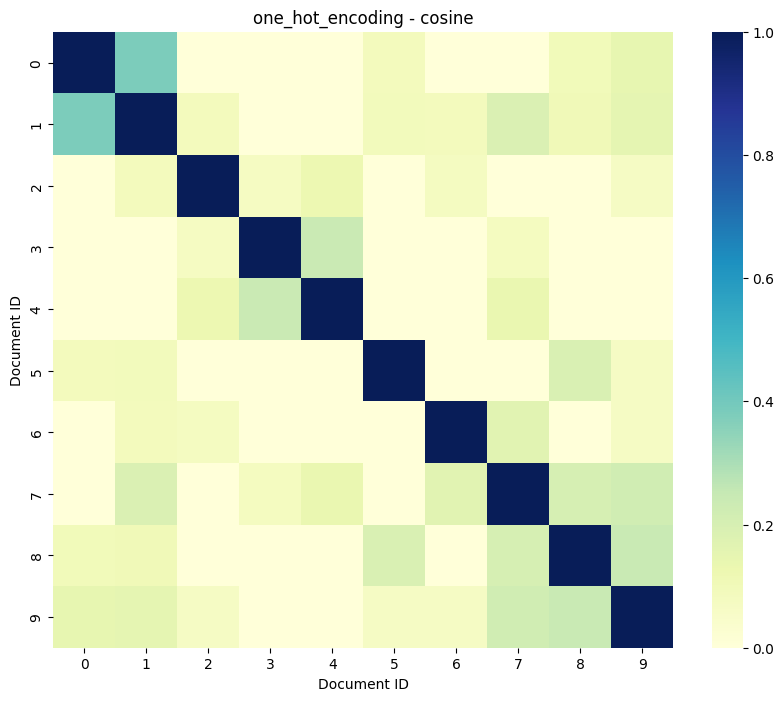

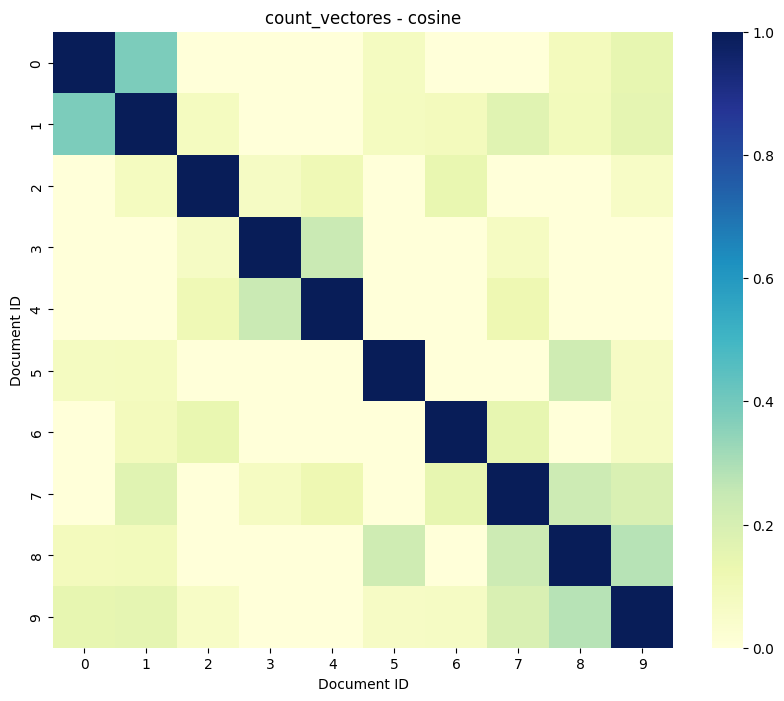

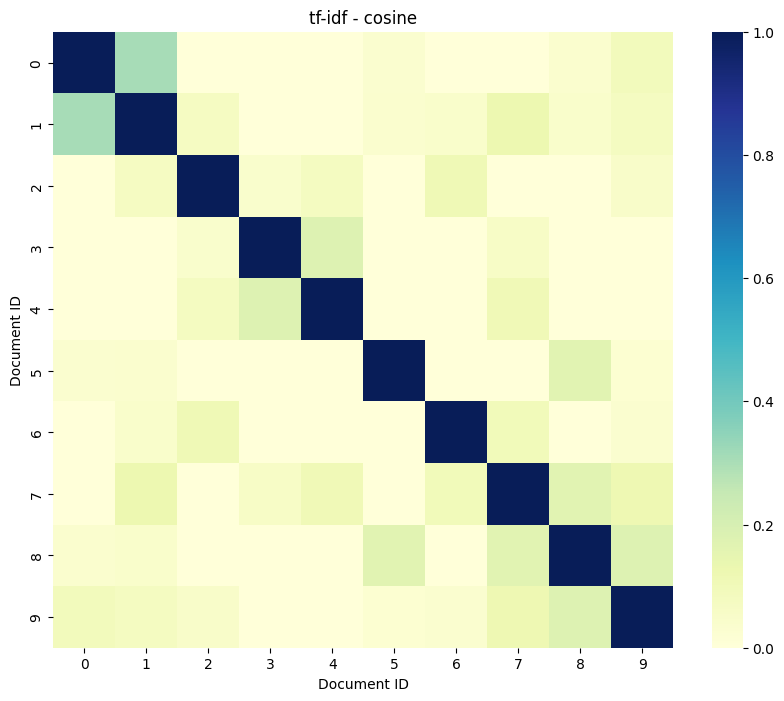

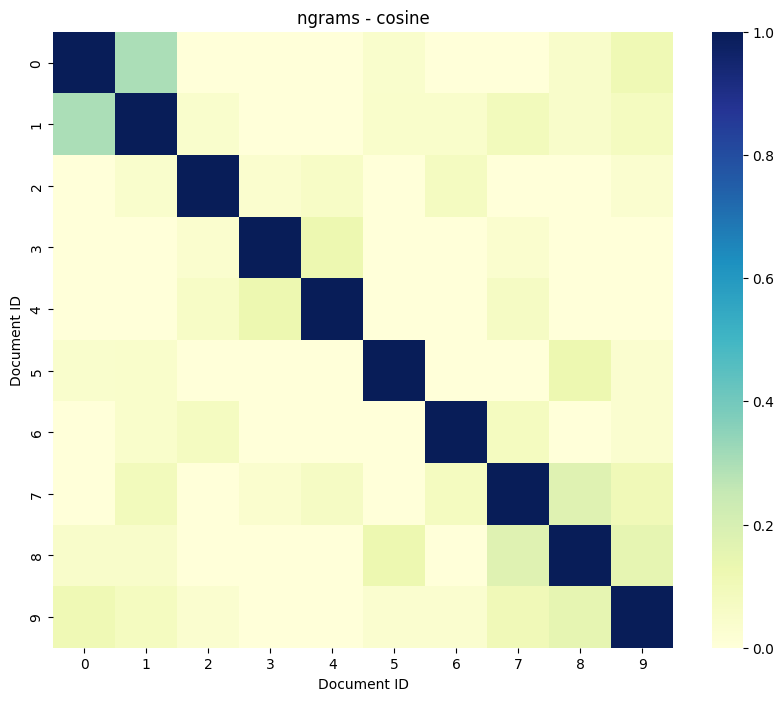

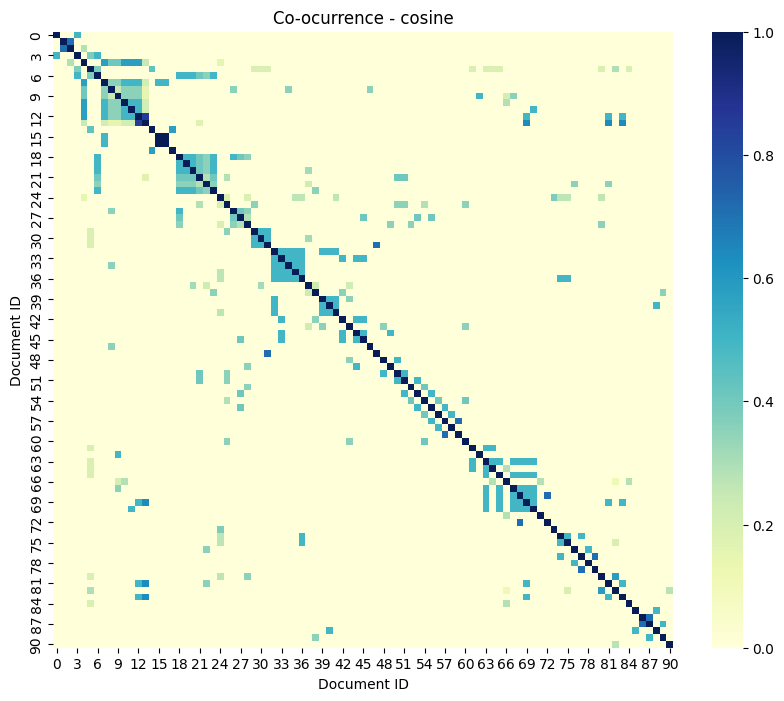

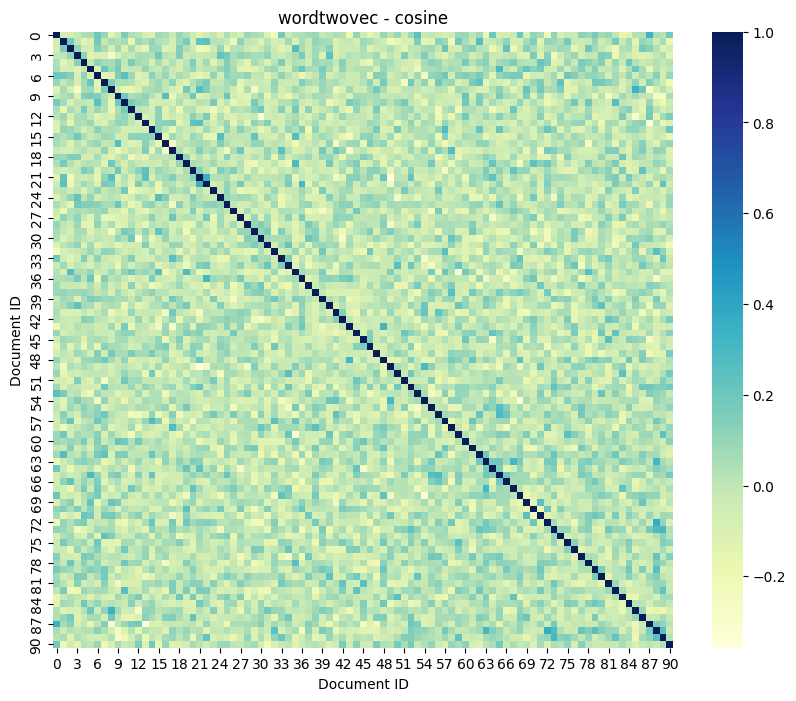

----------X----------


In [125]:
for metric, value in metrics.items():
  print(f"Heatmap referente à métrica {metric.upper()}")
  create_heatmap(value['one_hot_encoding'], metric, "one_hot_encoding")
  create_heatmap(value['count_vectores'], metric, "count_vectores")
  create_heatmap(value['tf-idf'], metric, "tf-idf")
  create_heatmap(value['ngrams'], metric, "ngrams")
  create_heatmap(value['cv'], metric, "Co-ocurrence")  
  create_heatmap(value['wordtwovec'], metric, "wordtwovec")
  print("----------X----------")